<a href="https://colab.research.google.com/github/Thapadit/Thapadit-/blob/main/229351_LAB09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [ ]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-04 02:18:33--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-04 02:18:33 (23.9 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [ ]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


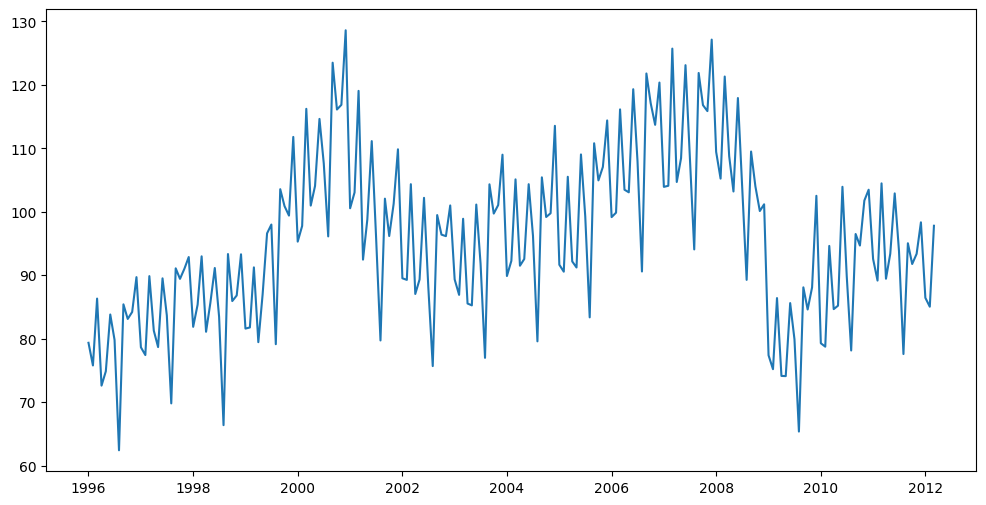

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [ ]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [ ]:
data.loc['1996-01-01']

,1996-01-01
Unnamed: 0,1.00
value,79.35


In [ ]:
# Add or change values

data.loc['2012-03-02','value'] = 86

data

,Unnamed: 0,value
time,,
1996-01-01,1.0,79.35
1996-02-01,2.0,75.78
1996-03-01,3.0,86.32
1996-04-01,4.0,72.60
1996-05-01,5.0,74.86
...,...,...
2011-12-01,192.0,98.34
2012-01-01,193.0,86.44
2012-02-01,194.0,85.04


# Moving average

In [ ]:
#5-MA
#data['MA'] = data['value'].rolling(window=5,center=True).mean()
#12-Ma
data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1.0,79.35,NaN
1996-02-01,2.0,75.78,NaN
1996-03-01,3.0,86.32,NaN
1996-04-01,4.0,72.60,NaN
1996-05-01,5.0,74.86,NaN
1996-06-01,6.0,83.81,NaN
1996-07-01,7.0,79.80,79.750417
1996-08-01,8.0,62.41,79.789167
1996-09-01,9.0,85.41,80.005000


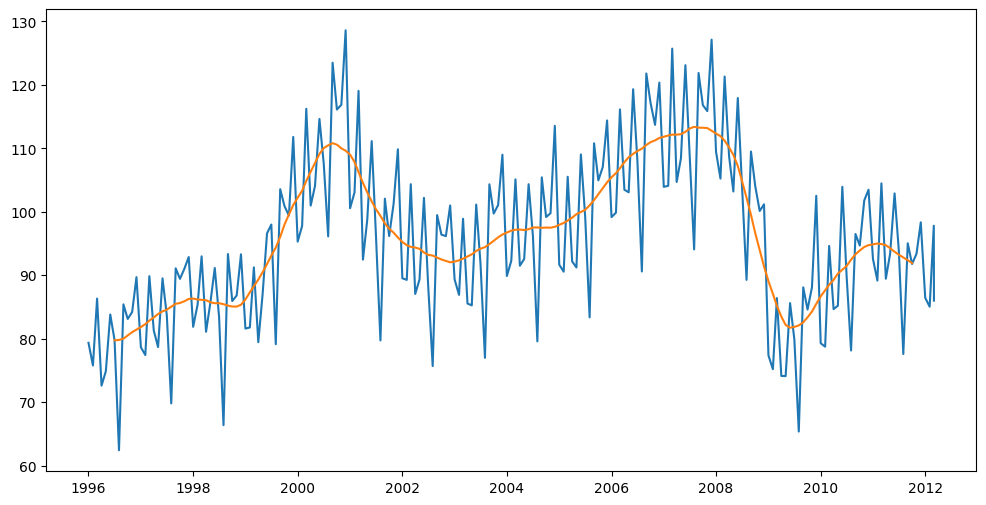

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

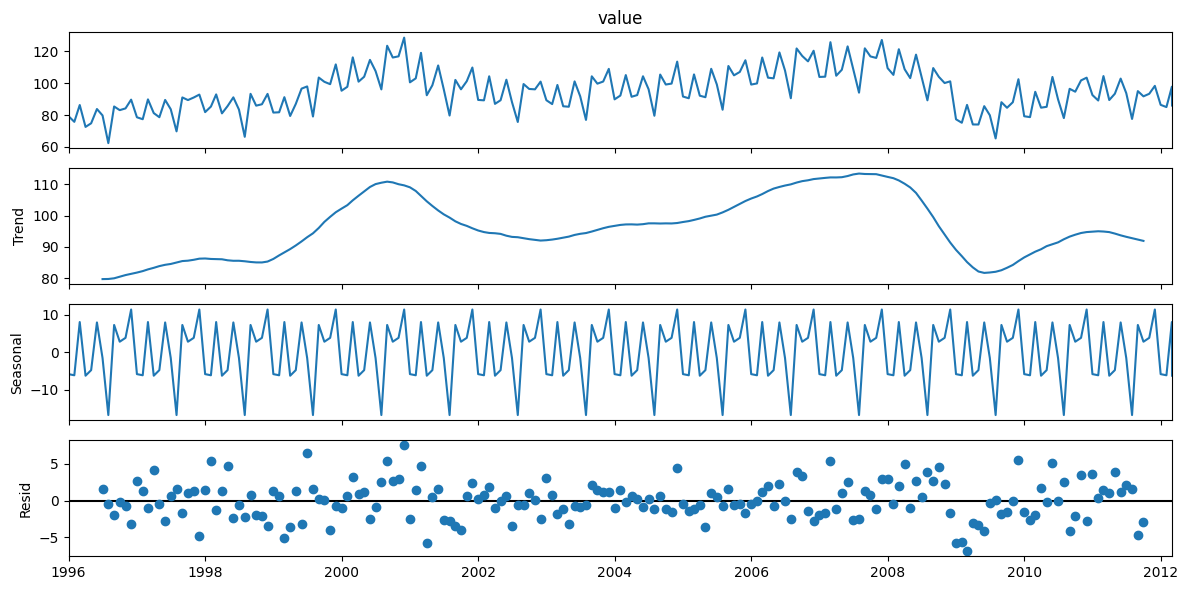

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive',
                                period = 12)

result_add.plot();

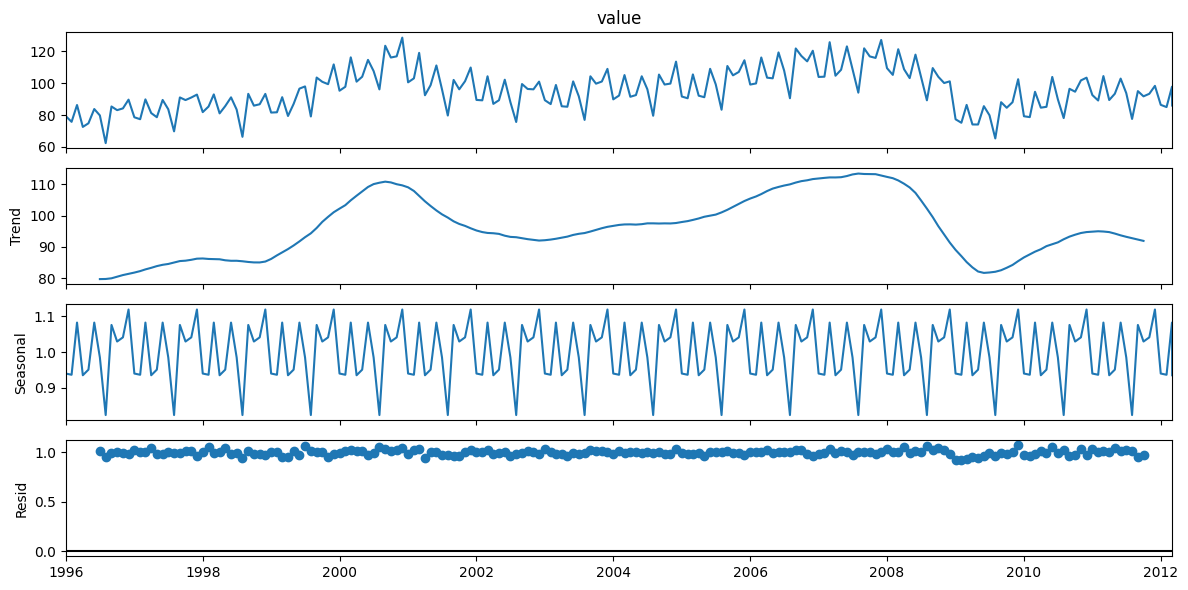

In [ ]:
result_mul = seasonal_decompose(data['value'], model='multiplicative', period=12)

result_mul.plot();

### เรียกดูแต่ละส่วน

In [ ]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: trend, Length: 196, dtype: float64
time
1996-01-01    -5.870942
1996-02-01    -6.182553
1996-03-01     8.099891
1996-04-01    -6.298248
1996-05-01    -4.801748
                ...    
2011-12-01    11.464224
2012-01-01    -5.870942
2012-02-01    -6.182553
2012-03-01     8.099891
2012-03-02    -6.298248
Name: seasonal, Length: 196, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: resid, Length: 196, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-12-01    98.34
2012-01-01    86.44
2012-02-01    85.04
2012-03-01    97.80
2012-03-02    86

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [ ]:
data_train = data.loc['1996-01-01':'2009-12-01']
data_train


,Unnamed: 0,value,MA
time,,,
1996-01-01,1.0,79.35,NaN
1996-02-01,2.0,75.78,NaN
1996-03-01,3.0,86.32,NaN
1996-04-01,4.0,72.60,NaN
1996-05-01,5.0,74.86,NaN
...,...,...,...
2009-08-01,164.0,65.36,82.087083
2009-09-01,165.0,88.09,82.577500
2009-10-01,166.0,84.60,83.358750


In [ ]:
data_test = data.loc['2010-01-01':'2012-03-01']
data_test

,Unnamed: 0,value,MA
time,,,
2010-01-01,169.0,79.28,86.665417
2010-02-01,170.0,78.74,87.613333
2010-03-01,171.0,94.62,88.496250
2010-04-01,172.0,84.66,89.266667
2010-05-01,173.0,85.20,90.256667
2010-06-01,174.0,103.94,90.866667
2010-07-01,175.0,89.87,91.460417
2010-08-01,176.0,78.14,92.448333
2010-09-01,177.0,96.50,93.293333


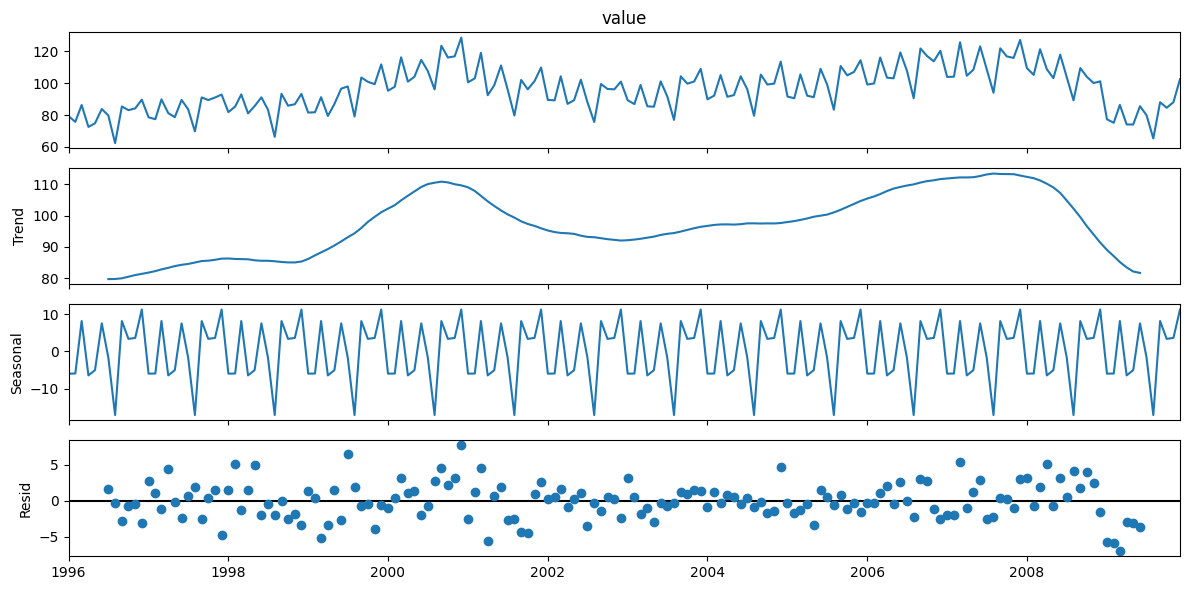

In [ ]:
mpl.rc("figure", figsize=(12,6))
result_data_train = seasonal_decompose(data_train['value'], model='additive',
                                period = 12)

result_data_train.plot();

In [ ]:
print(result_data_train.trend)
print(result_data_train.seasonal)
print(result_data_train.resid)
print(result_data_train.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2009-08-01   NaN
2009-09-01   NaN
2009-10-01   NaN
2009-11-01   NaN
2009-12-01   NaN
Name: trend, Length: 168, dtype: float64
time
1996-01-01    -5.985857
1996-02-01    -5.957941
1996-03-01     8.183245
1996-04-01    -6.462428
1996-05-01    -5.041178
                ...    
2009-08-01   -17.138902
2009-09-01     8.178886
2009-10-01     3.378341
2009-11-01     3.644335
2009-12-01    11.289463
Name: seasonal, Length: 168, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2009-08-01   NaN
2009-09-01   NaN
2009-10-01   NaN
2009-11-01   NaN
2009-12-01   NaN
Name: resid, Length: 168, dtype: float64
time
1996-01-01     79.35
1996-02-01     75.78
1996-03-01     86.32
1996-04-01     72.60
1996-05-01     74.86
               ...  
2009-08-01     65.36
2009-09-01     88.09
2009-10-01     84.60
2009-11-01     88.09
2009-1

In [ ]:
result_train = seasonal_decompose(data_train['value'], model='additive',
                                period = 12)

last_trend = result_train.trend.dropna().iloc[-1]
last_resid = result_train.resid.dropna().iloc[-1]

base_forecast = last_trend + last_resid


test_seasonality = result_train.seasonal.loc['2010-01-01':'2012-03-01']


y_pred = base_forecast + test_seasonality
y_pred = y_pred.reindex(data_test.index)

result_forecast = pd.DataFrame({'Actual': data_test['value'], 'Predicted': y_pred})
print(result_forecast.head())



AttributeError: 'DecomposeResult' object has no attribute 'index'

In [ ]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

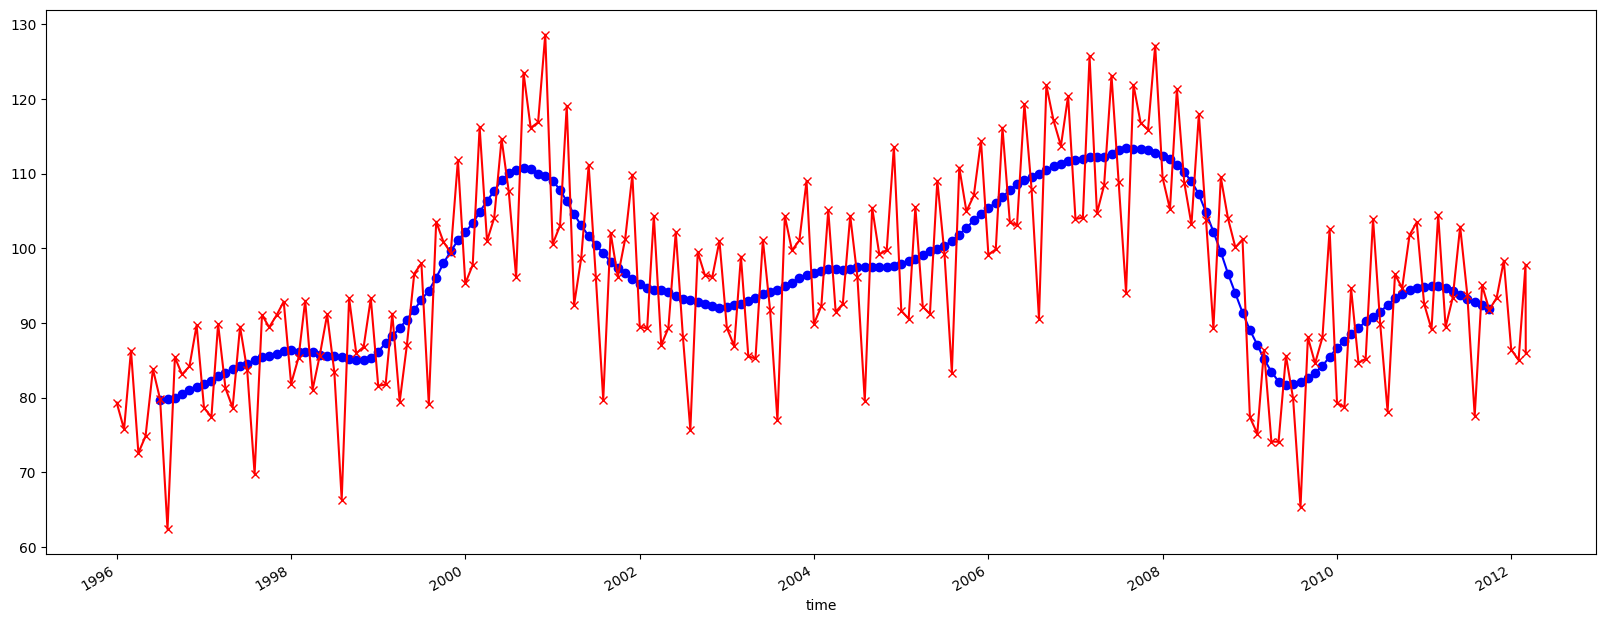

In [ ]:
ax1 = result_add.trend.plot(marker='o', color='blue', figsize=(20,8))
ax2 = result_add.observed.plot(marker='x', color='red', figsize=(20,8))